In [34]:
import pandas as pd 
df = pd.read_csv("Noodle1uu.csv")
df.head()

,rest_name,rest_zone,rating,review,rest_address,rest_type,rest_cost,rest_time
0,Noodle King,"Lotte Shopping Avenue, Karet",4.3,709,"Lotte Shopping Avenue, Lantai 3, Jl. Prof Dr S...",Korea,250,Jam: 11h ...
1,Legend of Noodle,Senopati,4.6,"1,457","Jl. Senopati No. 81, Senopati, Jakarta",Korea,200,Jam: 11h ...
2,Umaramu Indonesian Noodle,"Menteng Huis, Cikini",4.0,89,"Menteng Huis, Lantai 2, Jl. Cikini Raya No. 2 ...",Indonesia,150,Jam: 10h ...
3,"Jjang Korean Noodle, Grill, & Chikin’",Senopati,4.2,704,"Jl. Wolter Monginsidi No. 37, Senopati, Jakarta",Korea,300,Jam: 11h ...
4,Pò Noodle Bar,Senopati,4.2,206,"Jl. Prof. Joko Sutono, Blok SH No. 7B, Senopat...",Chinese,150,Jam: 11h ...


           rating    rest_cost
count  151.000000   151.000000
mean     3.867550   213.112583
std      0.480631   154.832966
min      2.000000    50.000000
25%      3.600000   100.000000
50%      3.900000   160.000000
75%      4.200000   300.000000
max      4.900000  1200.000000


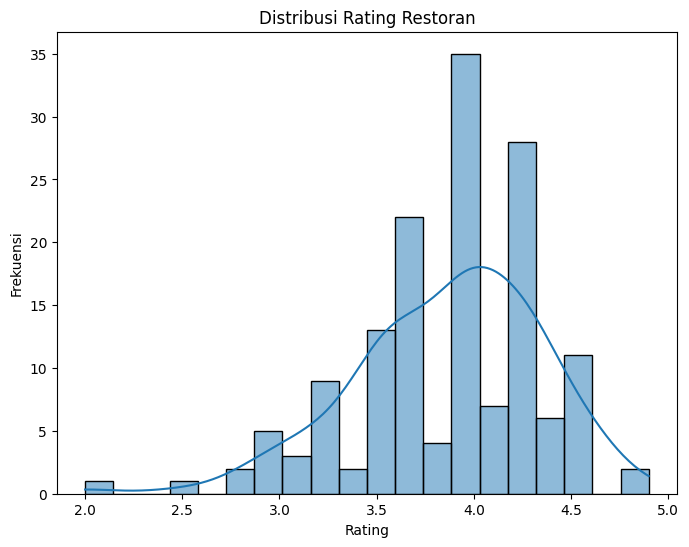

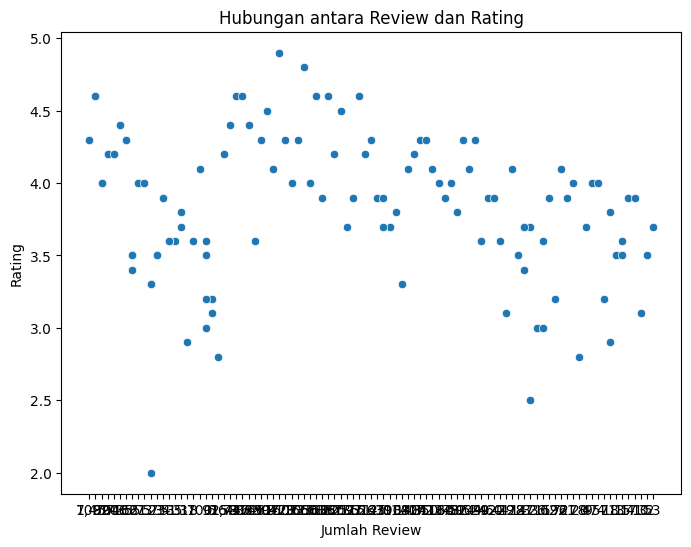

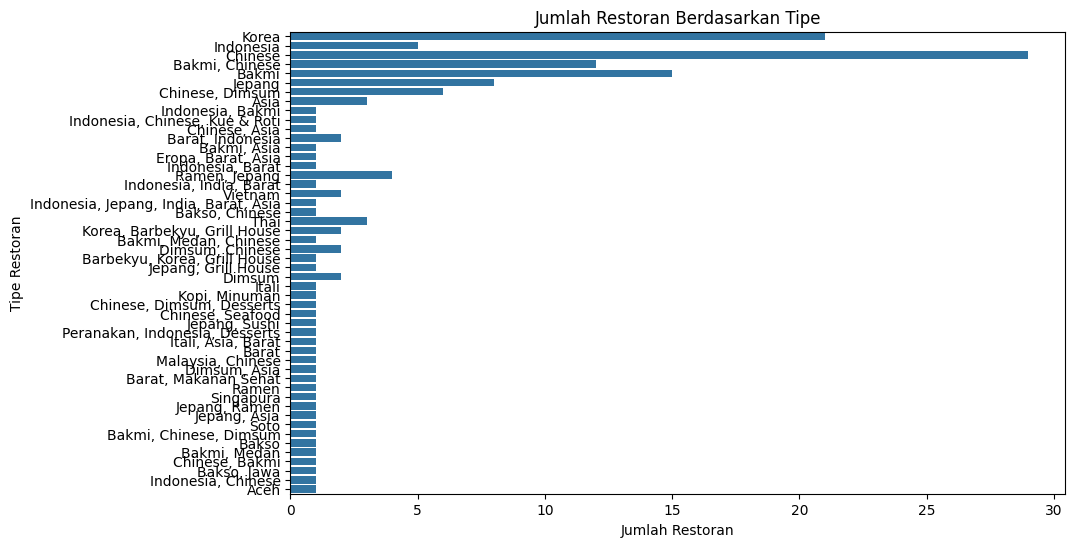

In [35]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif untuk fitur numerik
print(df.describe())

# Distribusi rating restoran menggunakan histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribusi Rating Restoran')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara rating dan review menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review', y='rating', data=df)
plt.title('Hubungan antara Review dan Rating')
plt.xlabel('Jumlah Review')
plt.ylabel('Rating')
plt.show()

# Jumlah restoran berdasarkan tipe restoran
plt.figure(figsize=(10, 6))
sns.countplot(y='rest_type', data=df)
plt.title('Jumlah Restoran Berdasarkan Tipe')
plt.xlabel('Jumlah Restoran')
plt.ylabel('Tipe Restoran')
plt.show()


In [36]:
#SCALING DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['rating', 'review']
df['review'] = df['review'].str.replace(',', '').str.replace(' Ulasan', '').astype(int)

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())


                               rest_name                     rest_zone  \
0                            Noodle King  Lotte Shopping Avenue, Karet   
1                       Legend of Noodle                      Senopati   
2              Umaramu Indonesian Noodle          Menteng Huis, Cikini   
3  Jjang Korean Noodle, Grill, & Chikin’                      Senopati   
4                          Pò Noodle Bar                      Senopati   

     rating    review                                       rest_address  \
0  0.902749  1.402505  Lotte Shopping Avenue, Lantai 3, Jl. Prof Dr S...   
1  1.529005  3.618497             Jl. Senopati No. 81, Senopati, Jakarta   
2  0.276493 -0.434279  Menteng Huis, Lantai 2, Jl. Cikini Raya No. 2 ...   
3  0.693997  1.387692    Jl. Wolter Monginsidi No. 37, Senopati, Jakarta   
4  0.693997 -0.087660  Jl. Prof. Joko Sutono, Blok SH No. 7B, Senopat...   

   rest_type  rest_cost                                          rest_time  
0      Korea        2

In [37]:
# FEATURE SELECTION

columns_to_drop = ['rest_name', 'rest_zone','rest_address','rest_type', 'rest_time']

df = df.drop(columns=columns_to_drop)

print(df.head())


     rating    review  rest_cost
0  0.902749  1.402505        250
1  1.529005  3.618497        200
2  0.276493 -0.434279        150
3  0.693997  1.387692        300
4  0.693997 -0.087660        150


In [38]:
#SPLIT TRAINTEST

from sklearn.model_selection import train_test_split

X = df.drop(columns=['rating'])  
y = df['rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Train - Fitur:", X_train.shape, "Target:", y_train.shape)
print("Data Test - Fitur:", X_test.shape, "Target:", y_test.shape)


Data Train - Fitur: (120, 2) Target: (120,)
Data Test - Fitur: (31, 2) Target: (31,)


In [55]:
#CROSS VALIDATION

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split

X = df['rating'].values.reshape(-1, 1)  
y = df['rating']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()

num_folds = 5
cross_val_scores = cross_val_score(regressor, X_train, y_train, cv=num_folds)

print(f"Hasil Cross-Validation ({num_folds} fold) pada 'rating' sebagai fitur dan target:")
for fold_idx, score in enumerate(cross_val_scores, start=1):
    print(f"Fold-{fold_idx} Score: {score:.4f}")

mean_score = cross_val_scores.mean()
print(f"Rata-rata Score Cross-Validation: {mean_score:.4f}")


Hasil Cross-Validation (5 fold) pada 'rating' sebagai fitur dan target:
Fold-1 Score: 1.0000
Fold-2 Score: 1.0000
Fold-3 Score: 0.9902
Fold-4 Score: 0.9011
Fold-5 Score: 0.9963
Rata-rata Score Cross-Validation: 0.9775


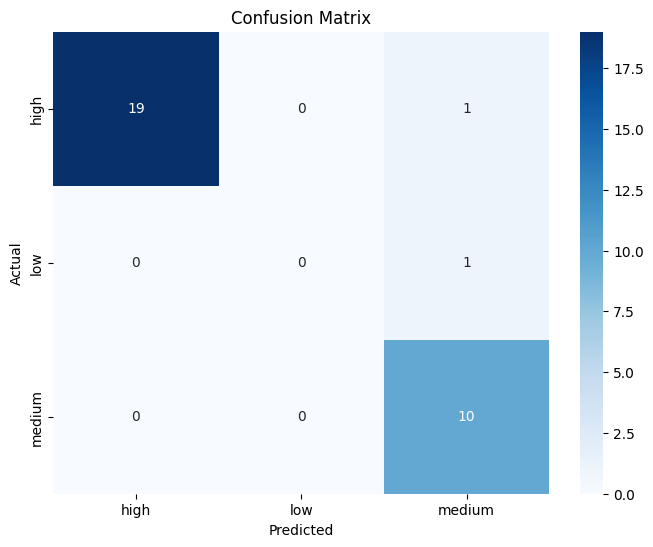

Confusion Matrix:
[[19  0  1]
 [ 0  0  1]
 [ 0  0 10]]
Precision Score: 0.9462
Recall Score: 0.9355
F1 Score: 0.9219
Accuracy Score: 0.9355


In [56]:
#PERFORMANCE EVALUATION

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df['rating_category_encoded'] = label_encoder.fit_transform(df['rating_category'])

X = df.drop(columns=['rating', 'rating', 'rating_category', 'rating_category_encoded'])  # Features
y = df['rating_category_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
print(f"Precision Score: {precision:.4f}")

recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
print(f"Recall Score: {recall:.4f}")

f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)
print(f"F1 Score: {f1:.4f}")

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy:.4f}")
